In [1]:
import numpy as np
from sympy import *
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time

In [129]:
class kite:
    def __init__(self,pos,vel):
        self.mass = 10
#        self.velocity = np.array([10,10,10])
#        self.position = np.array([4.3,4.7,7.26])
        self.velocity = vel
        self.position = pos
        
class tether :
    def __init__(self,l):
        self.length = l #unstreched length
        self.N   = 30 #number of segment 
        self.E   = 9e11          
        self.d   = 0.0025 #diameter of tether [mm]                     
        self.rho = 0.01  #density [kg/m]   
        self.l_e = self.length/(self.N+1)
        self.m_e = self.l_e*self.rho
        self.A  = np.pi*(self.d/2)**2 #area
        
#kite1 = kite()
#line = tether(10)

#wind = np.array([0,15,0])

def line_pos(x,line,kite):
    
    rho_air   = 1.225
    C_d_rope  = 1.2
    L_s = line.l_e
    
    theta     = float(x[0])
    phi       = float(x[1])
    F_0       = x[2]
    T_n_x     = float(F_0*np.sin(theta)*np.cos(phi))
    T_n_y     = float(F_0*np.sin(theta))
    T_n_z     = float(F_0*np.cos(theta)*np.cos(phi))    
    T_n_0       = np.array([T_n_x, T_n_y, T_n_z]) 
    T_j       = T_n_0    
    F_g       = np.array([0,0,-line.m_e*9.81])
    wind = np.array([15,15,0])
    v_cross   = 0
    
     #implémenter plus tard la cross wind speed
    
    P_J       = np.zeros([3,int(line.N)])
    p_j = np.array([0,0,0])
    
    for j in range(0,line.N):        
        T_vec = T_j/(norm(T_j))
        
        v_cross = wind - np.dot(wind,T_vec)*T_vec
        Fk_D_norm = 0.5*rho_air*C_d_rope*line.l_e*line.d*norm(v_cross)*v_cross
        
        
        T_j   = T_j - Fk_D_norm*T_vec-F_g
       
        L_j   = ((norm(T_j)/(line.E*line.A)) +1)*L_s     #length streched d'un element 
        p_j   = p_j + L_j* T_vec
        P_J[:,j]   = p_j
    return p_j

#def g(x):
#    kite = kite1
#    line = tether(9.8) 
#    
#    rho_air   = 1.225
#    C_d_rope  = 1.2
#    L_s = line.l_e
#    
#    theta     = float(x[0])
#    phi       = float(x[1])
#    F_0       = x[2]
#    T_n_x     = float(F_0*np.sin(theta)*np.cos(phi))
#    T_n_y     = float(F_0*np.sin(theta))
#    T_n_z     = float(F_0*np.cos(theta)*np.cos(phi))
#    #T_n_0     = F_0*Matrix([np.sin(theta)*np.cos(phi),np.sin(theta),np.cos(theta)*np.cos(phi)])
#    T_n_0     = np.array([T_n_x, T_n_y, T_n_z]) 
#    T_j       = T_n_0    
#    F_g       = np.array([0,0,-line.m_e*9.81])
 #   P_J       = np.zeros([3,int(line.N)])
 #   p_j = np.array([0,0,0])
 #   
 #   for j in range(0,line.N):        
 #       T_vec = T_j/(norm(T_j))
 #       
 #       v_cross = wind - np.dot(wind,T_vec)*T_vec
 #       Fk_D_norm = 0.5*rho_air*C_d_rope*line.l_e*line.d*norm(v_cross)*v_cross
 #       
 #       
 #       T_j   = T_j - Fk_D_norm*T_vec-F_g
 #      
 #       L_j   = ((norm(T_j)/(line.E*line.A)) +1)*L_s     #length streched d'un element 
 #       p_j   = p_j + L_j* T_vec
 #       P_J[:,j]   = p_j
 #         
 #   tol = norm(p_j-kite.position)
 #   return tol

def line_pos_plot(x,line,kite): #idem que plus haut mais permet de dessiner la ligne 
    rho_air   = 1.225
    C_d_rope  = 1.2
    L_s = line.l_e
    
    theta     = float(x[0])
    phi       = float(x[1])
    F_0       = x[2]
    T_n_x     = float(F_0*np.sin(theta)*np.cos(phi))
    T_n_y     = float(F_0*np.sin(theta))
    T_n_z     = float(F_0*np.cos(theta)*np.cos(phi))    
    T_n_0       = np.array([T_n_x, T_n_y, T_n_z]) 
    T_j       = T_n_0    
    F_g       = np.array([0,0,-line.m_e*9.81])
    wind = np.array([0,15,0])
    v_cross   = 0
    
     #implémenter plus tard la cross wind speed
    
    P_J       = np.zeros([3,int(line.N)])
    p_j = np.array([0,0,0])
    
    for j in range(0,line.N):        
        T_vec = T_j/(norm(T_j))
        
        v_cross = wind - np.dot(wind,T_vec)*T_vec
        Fk_D_norm = 0.5*rho_air*C_d_rope*line.l_e*line.d*norm(v_cross)*v_cross
        
        
        T_j   = T_j - Fk_D_norm*T_vec-F_g
       
        L_j   = ((norm(T_j)/(line.E*line.A)) +1)*L_s     #length streched d'un element 
        p_j   = p_j + L_j* T_vec
        P_J[:,j]   = p_j
        
    ax = plt.axes(projection='3d')# Data for a three-dimensional line
    zline = P_J[0,:]
    xline = P_J[1,:]
    yline = P_J[2,:]
    ax.plot3D(xline, yline, zline, 'red')# Data for three-dimensional
    return p_j 

In [123]:
#fonction pour comparer la position de la ligne et du kite en focntion des inputs x = [angle 1, angle 2, force]
def opti(x,line,kite) :# p_goal = position du kite   
    
    p = line_pos(x,line,kite)
    delta = norm(p-kite.position)
    print(x,p,delta)
    return delta
    

[0.1 0.1 1. ] [0.16486312 0.16569634 7.58847706] 6.385647274493212
[0.10000001 0.1        1.        ] [0.16486314 0.16569636 7.58847706] 6.385647259131639
[0.1        0.10000001 1.        ] [0.16486312 0.16569634 7.58847706] 6.385647274627963
[0.1        0.1        1.00000001] [0.16486313 0.16569634 7.58847706] 6.385647273160253
[0.6981317  0.08652491 1.13329586] [1.58351643 1.59078231 7.0200237 ] 5.110421823896645
[0.69813169 0.08652491 1.13329586] [1.5835164  1.59078228 7.02002373] 5.110421850855677
[0.6981317  0.08652492 1.13329586] [1.58351643 1.59078231 7.0200237 ] 5.110421824890162
[0.6981317  0.08652491 1.13329587] [1.58351644 1.59078232 7.0200237 ] 5.110421816422756
[ 0.6981317  -0.01282681  1.88068477] [2.23065601 2.23087498 6.70488071] 4.700146332426088
[ 0.69813169 -0.01282681  1.88068477] [2.23065597 2.23087494 6.70488074] 4.700146359250459
[ 0.6981317  -0.0128268   1.88068477] [2.23065601 2.23087498 6.70488071] 4.700146332221221
[ 0.6981317  -0.01282681  1.88068478] [2.230

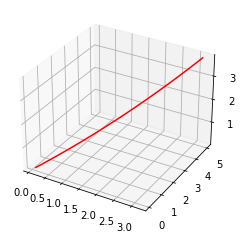

In [134]:

kite_vel = np.array([10,10,10]) # vitesse du kite, pas d'impact pour l'instant 
kite_pos = np.array([6,0,5]) # position du cable
line1 = tether(7.85) #longueur du cable 
kite1= kite(kite_pos,kite_vel) 

angle_max = float(np.deg2rad(40))
bouns = ((-angle_max,angle_max),(-angle_max,angle_max), (1,10000))

start_time = time.time()
res = minimize(opti, np.array([0.1,0.1,1]),method = None, args=(line1,kite1), bounds= bouns, constraints=(), tol= 1e-7 )
print("--- %s seconds ---" % (time.time() - start_time))
print(line_pos(res.x,line,kite),res)
final = line_pos_plot(res.x,line,kite)
xi = res.x
print(final)

In [132]:
norm(kite_pos
    )

7.810249675906654

     fun: 0.14652636240866548
     jac: array([5.82612844e-03, 1.81799020e-05, 2.25375095e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 208
     nit: 8
  status: 1
 success: True
       x: array([5.35262373e-01, 4.22858094e-01, 4.99941063e+02])
[4.36528174 4.77133147 7.37009129] 0.14652636240866548
[4.29999848 4.6999985  7.25999843] 2.6486873966510246e-06


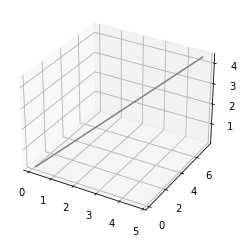

In [32]:
#version brute
angle_max = float(np.deg2rad(50))
angle_range = (-angle_max, angle_max)
rranges = (angle_range,angle_range,(1,1000))
from scipy import optimize
#resbrute = optimize.brute(g, rranges, args=params, full_output=True,
 #                         finish=optimize.fmin)

resbrute = optimize.brute(g, rranges, full_output=True,
                          finish=optimize.fmin)



   direc: array([[-3.74353832e-03, -1.75593051e-02,  3.16275819e-01],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.77446228e-05, -2.21276327e-04,  1.72348564e-03]])
     fun: 2.248068185804789e-12
 message: 'Optimization terminated successfully.'
    nfev: 2209
     nit: 34
  status: 0
 success: True
       x: array([0.59028568, 0.83756957, 5.64260905])
[4.34323278 4.73508003 7.34063185] 0.09798628051878475
[4.36856422 4.7684592  7.3687683 ] 0.05064843388982657
[4.29999848 4.6999985  7.25999843] 0.1957510093636883


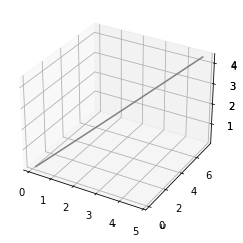

In [52]:
xx2 = minimize(g, np.array([0,0,0.1]), method= 'Powell', tol= 1e-8, callback=None)
#xx = minimize(g, np.array([0,0,0.1]), method= 'BFGS', bounds= bouns, tol= 1e-8, callback=None)
#xx1 = minimize(g, x0, method= 'BFGS', bounds= bouns, tol= 1e-8, callback=None)
print(xx)
print(line_pos(xx.x,line,kite1), g(xx.x))
print(line_pos(xx2.x,line,kite1), g(xx2.x))
print(pf, g(resbrute[0]))
#print(line_pos(xx1.x,line,kite1), g(xx1.x))

(array([ 0.64489809, -1.02840727,  3.2519893 ]), 2.6486875265236023e-06, array([[[[-8.72664626e-01, -8.72664626e-01, -8.72664626e-01, ...,
          -8.72664626e-01, -8.72664626e-01, -8.72664626e-01],
         [-8.72664626e-01, -8.72664626e-01, -8.72664626e-01, ...,
          -8.72664626e-01, -8.72664626e-01, -8.72664626e-01],
         [-8.72664626e-01, -8.72664626e-01, -8.72664626e-01, ...,
          -8.72664626e-01, -8.72664626e-01, -8.72664626e-01],
         ...,
         [-8.72664626e-01, -8.72664626e-01, -8.72664626e-01, ...,
          -8.72664626e-01, -8.72664626e-01, -8.72664626e-01],
         [-8.72664626e-01, -8.72664626e-01, -8.72664626e-01, ...,
          -8.72664626e-01, -8.72664626e-01, -8.72664626e-01],
         [-8.72664626e-01, -8.72664626e-01, -8.72664626e-01, ...,
          -8.72664626e-01, -8.72664626e-01, -8.72664626e-01]],

        [[-7.80805192e-01, -7.80805192e-01, -7.80805192e-01, ...,
          -7.80805192e-01, -7.80805192e-01, -7.80805192e-01],
         [-7.80

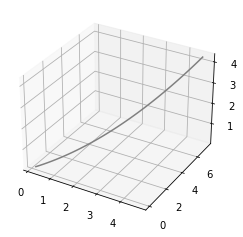

In [25]:
resbrute[0]  # global minimum
print(resbrute)
resbrute[1]  # function value at global minimum
pf = line_pos(resbrute[0],line,kite1)
print(pf,resbrute[0])
print(tidaa)
